In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from scipy.stats import zscore, norm, randint

# supress warnings
import warnings
warnings.filterwarnings('ignore')

## Import data and Overview

In [2]:
df = pd.read_excel('Data_IPL.xlsx')
df.index = ([','.join('') for i in range(len(df))])
df.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR -B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.000000,0,307,15,20.466667,8.898551,13.933333,2009,50000,50000
,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.000000,0,29,0,0.000000,14.500000,0.000000,2008,50000,50000
,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.014493,5,1059,29,36.517241,8.810316,24.896552,2008,200000,350000
,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.315789,0,1125,49,22.959184,6.232687,22.142857,2011,100000,850000
,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.714940,28,0,0,0.000000,0.000000,0.000000,2011,100000,800000


In [3]:
df.shape

# This dataframe has 130 rows and 25 columns

(130, 26)

In [4]:
df.columns

Index(['Sl.NO.', 'PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS ', 'AVE', 'SR -B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries,  to 
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR -B          130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C         130 

In [6]:
# Some categorical variables are not in string data type. So, we need to typecast all the categorical
# variables into string

df[['AUCTION YEAR','TEAM','COUNTRY','PLAYING ROLE','AGE','CAPTAINCY EXP']] = df[['AUCTION YEAR','TEAM','COUNTRY','PLAYING ROLE','AGE','CAPTAINCY EXP']].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries,  to 
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    object 
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    object 
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR -B          130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C         130 

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl.NO.,130.0,65.500000,37.671829,1.0,33.250000,65.500000,97.750000,1.300000e+02
T-RUNS,130.0,2166.715385,3305.646757,0.0,25.500000,542.500000,3002.250000,1.547000e+04
T-WKTS,130.0,66.530769,142.676855,0.0,0.000000,7.000000,47.500000,8.000000e+02
ODI-RUNS-S,130.0,2508.738462,3582.205625,0.0,73.250000,835.000000,3523.500000,1.842600e+04
ODI-SR-B,130.0,71.164385,25.898440,0.0,65.650000,78.225000,86.790000,1.166600e+02
ODI-WKTS,130.0,76.076923,111.205070,0.0,0.000000,18.500000,106.000000,5.340000e+02
ODI-SR-BL,130.0,34.033846,26.751749,0.0,0.000000,36.600000,45.325000,1.500000e+02
RUNS-S,130.0,514.246154,615.226335,0.0,39.000000,172.000000,925.250000,2.254000e+03
HS,130.0,47.430769,36.403624,0.0,16.000000,35.500000,73.750000,1.580000e+02
AVE,130.0,18.719244,11.094102,0.0,9.825000,18.634921,27.872118,5.011111e+01


In [8]:
df.isna().sum()
# There is no null values in the dataframe

Sl.NO.           0
PLAYER NAME      0
AGE              0
COUNTRY          0
TEAM             0
PLAYING ROLE     0
T-RUNS           0
T-WKTS           0
ODI-RUNS-S       0
ODI-SR-B         0
ODI-WKTS         0
ODI-SR-BL        0
CAPTAINCY EXP    0
RUNS-S           0
HS               0
AVE              0
SR -B            0
SIXERS           0
RUNS-C           0
WKTS             0
AVE-BL           0
ECON             0
SR-BL            0
AUCTION YEAR     0
BASE PRICE       0
SOLD PRICE       0
dtype: int64

- From these informations we can already see that there are neither missing nor null values.

## Univariate Analysis


In [9]:
# Copy the code from https://github.com/code4kunal/eda-python-examples/blob/master/EDA-%20Malnutrion/Malnutrition_%20The%20disease%20that%20no%20one%20cares%20about.ipynb
def odp_plots(df, col):
    f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 7.2))
    
    # Boxplot to check outliers
    sns.boxplot(x = col, data = df, ax = ax1, orient = 'v', color = 'darkslategrey')
    
    # Distribution plot with outliers
    sns.distplot(df[col], ax = ax2, color = 'teal', fit = norm).set_title(f'{col} with outliers')
    
    # Removing outliers, but in a new dataframe
    upperbound, lowerbound = np.percentile(df[col], [1, 99])
    y = pd.DataFrame(np.clip(df[col], upperbound, lowerbound))
    
    # Distribution plot without outliers
    sns.distplot(y[col], ax = ax3, color = 'tab:orange', fit = norm).set_title(f'{col} without outliers')
    
    kwargs = {'fontsize':14, 'color':'black'}
    ax1.set_title(col + ' Boxplot Analysis', **kwargs)
    ax1.set_xlabel('Box', **kwargs)
    ax1.set_ylabel(col + ' Values', **kwargs)

    return plt.show()

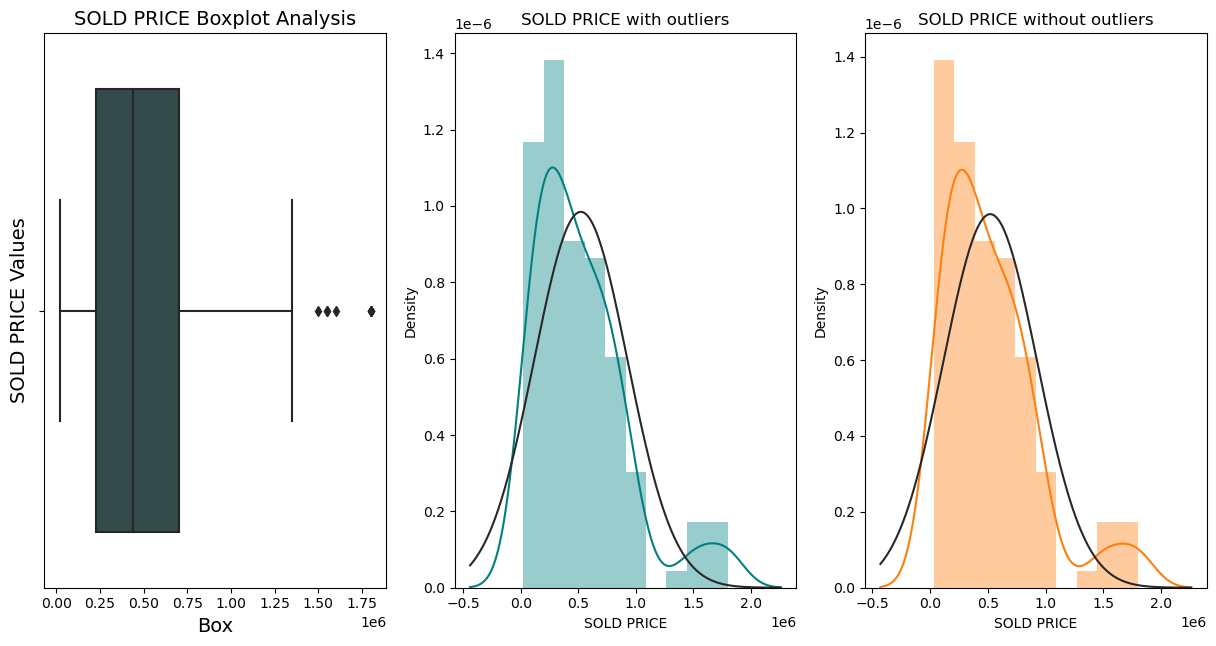

In [10]:
odp_plots(df,'SOLD PRICE')

- With this information, it can be seen that 'SOLD PRICE' are right-skewed and some outliers lie above ~1,400,000


## Multivariate Analysis

<AxesSubplot:>

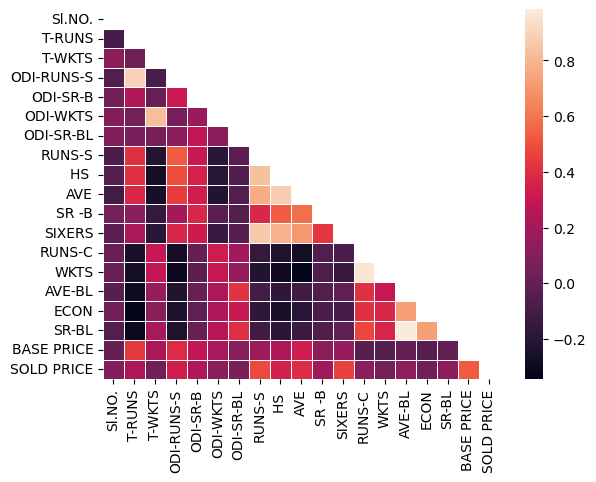

In [11]:
corr = df.corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask,  linewidths = .5)

In [12]:
# Filter for correlation value greater than threshold
sort = corr.abs().unstack()
sort = sort.sort_values(kind = "quicksort", ascending = False)
display(sort[(sort > 0.8) & (sort < 1)])

SR-BL       AVE-BL        0.983415
AVE-BL      SR-BL         0.983415
RUNS-C      WKTS          0.959210
WKTS        RUNS-C        0.959210
ODI-RUNS-S  T-RUNS        0.892823
T-RUNS      ODI-RUNS-S    0.892823
AVE         HS            0.876252
HS          AVE           0.876252
SIXERS      RUNS-S        0.866213
RUNS-S      SIXERS        0.866213
HS          RUNS-S        0.834631
RUNS-S      HS            0.834631
ODI-WKTS    T-WKTS        0.822940
T-WKTS      ODI-WKTS      0.822940
dtype: float64

- Correlation between Bowling average and Bowling strike rate are the highest (0.98).

## Sold price Insights
- Sold price trend by Country, Playing Role, Team, Age, and Aution Year
- How captaincy experience and experience to play for more than one team affect the sold price

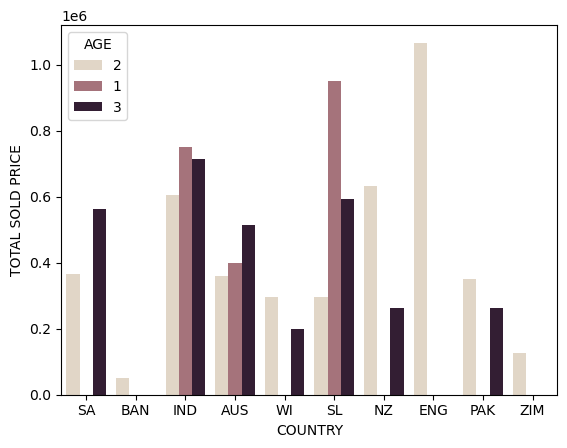

In [13]:
ax = sns.barplot(x = "COUNTRY", y = "SOLD PRICE", hue = 'AGE',
                 data = df, ci = None, palette = "ch:.25")
plt.xlabel('COUNTRY')
plt.ylabel('TOTAL SOLD PRICE')
plt.show()

- During auction, every country has players with age group between 25 and 35 years old. However, only India, Australia, and Sri lanka have players with age group below 25.

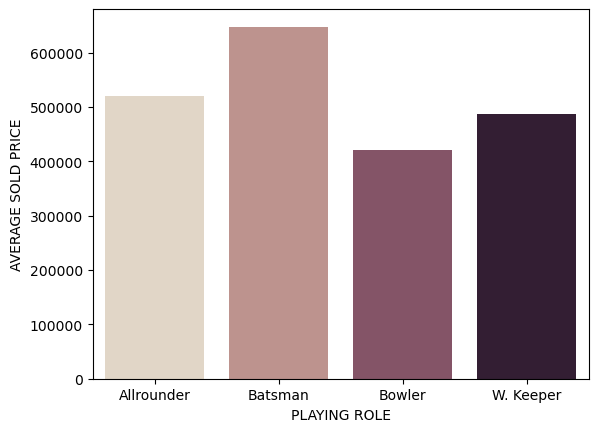

In [14]:
df_wage = df.groupby('PLAYING ROLE', as_index=False)['SOLD PRICE'].mean()
ax = sns.barplot(x = "PLAYING ROLE", y = "SOLD PRICE",
                 data = df_wage, palette = "ch:.25")
plt.xlabel('PLAYING ROLE')
plt.ylabel('AVERAGE SOLD PRICE')
plt.show()

- By average, the most expensive players bought at an IPL are Batsman, followed by Allrounder, W. Keeper, and Bowler

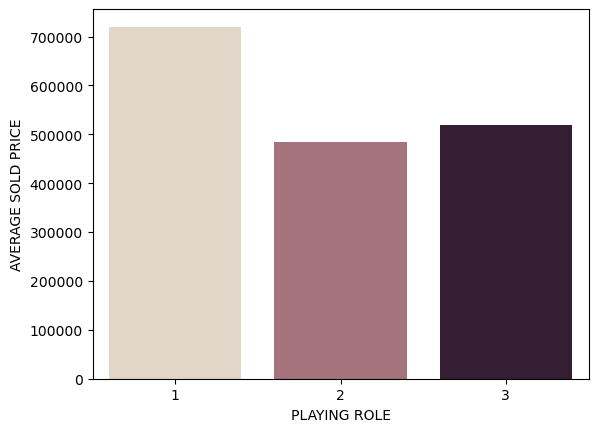

In [15]:
df_age = df.groupby('AGE', as_index=False)['SOLD PRICE'].mean()
ax = sns.barplot(x = "AGE", y = "SOLD PRICE",
                 data = df_age, palette = "ch:.25")
plt.xlabel('PLAYING ROLE')
plt.ylabel('AVERAGE SOLD PRICE')
plt.show()

- By average, Players who are below 25 years old are sold the highest during aution.

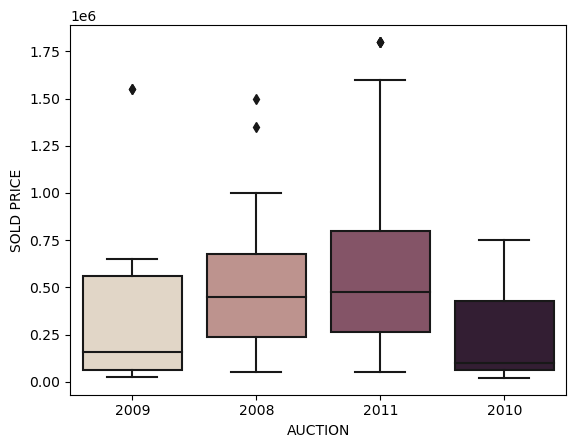

In [16]:
ax = sns.boxplot(x = "AUCTION YEAR", y = "SOLD PRICE", data = df, palette = "ch:.25")
plt.xlabel('AUCTION')
plt.ylabel('SOLD PRICE')
plt.show()

- Since 2008, the total sold price in auction kept depleted and reached the lowest point in 2010. Then, it was bounced back and increased significantly in 2011

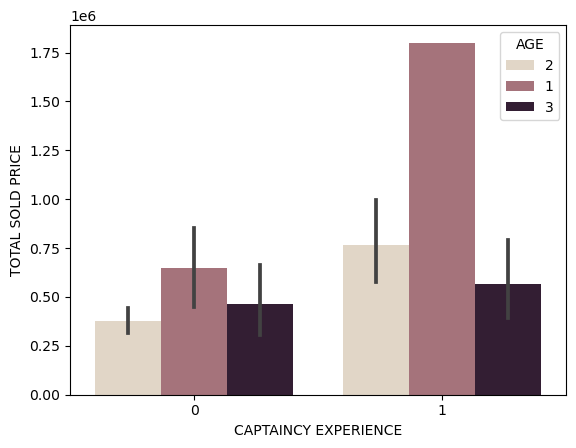

In [17]:
ax = sns.barplot(x = "CAPTAINCY EXP", y = "SOLD PRICE", hue = 'AGE',
                 data = df, palette = "ch:.25")
plt.xlabel('CAPTAINCY EXPERIENCE')
plt.ylabel('TOTAL SOLD PRICE')
plt.show()

- Captaincy Experience can be a plus point and increase players' sold price

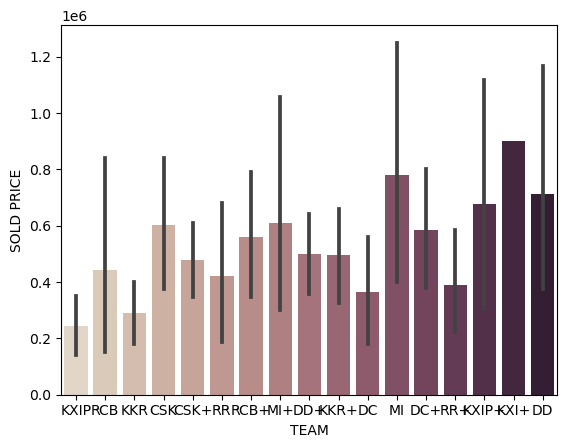

In [18]:
sns.barplot(x = "TEAM", y = "SOLD PRICE", data = df, palette = "ch:.25")
plt.show()

- KXI+, MI, and DD are top 3 teams who gained the most during the aution

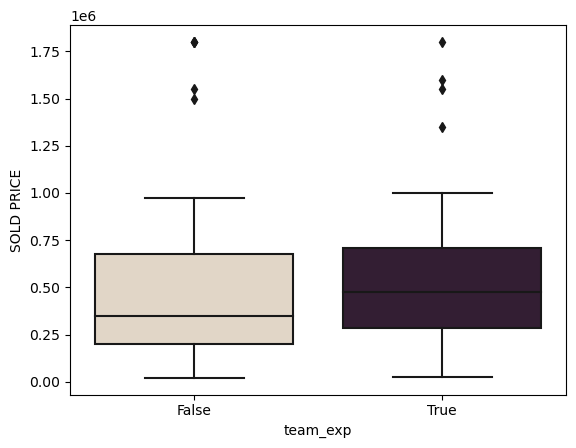

In [19]:
# Create new column for player who had played for more than one team called "team_exp"

df_team = df.copy(deep = True)
# df_team
df_team['team_exp'] = df_team['TEAM'].str.contains('\w[+]', case=False)
# df_team['team_exp'].value_counts()
sns.boxplot(x = "team_exp", y = "SOLD PRICE", data = df_team, palette = "ch:.25")
plt.show()

- Besides the captaincy experience, experience to play for more than one group is also an advantage which may increase the sold price

## Players Performance Insight

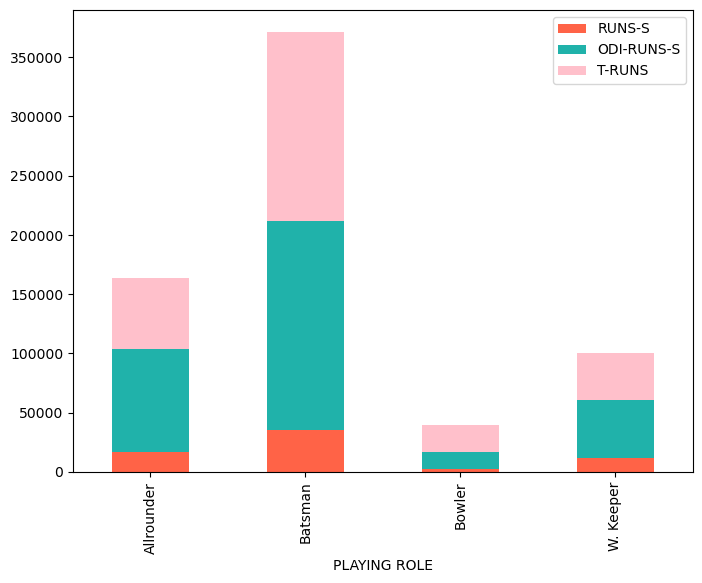

In [41]:
df_run = df[["RUNS-S", "ODI-RUNS-S", "T-RUNS", 'PLAYING ROLE']]
df_run = df_run.groupby('PLAYING ROLE', as_index=False)[["RUNS-S", "ODI-RUNS-S", "T-RUNS"]].sum()
# df_run
sn.barplot(data = df_run, x = 'PLAYING ROLE')
ax = df_run.plot.bar(x='PLAYING ROLE', stacked=True, color=['tomato','lightseagreen','pink'], figsize=(8,6))

# set the label
ax.set_xticklabels([d.strftime('%b %d\n%Y') for d in df_pivoted.index], rotation=0)
ax.bar_label(ax.containers[-1], fmt='%.2f') # default on top
for bars in ax.containers:
    labels = [f"{bar.get_height():.2f}" if bar.get_height() > 0.2 else '' for bar in bars]
    ax.bar_label(bars, labels=labels, label_type='center', color='white')
ax.set_xlabel('')

In [ ]:
# Performance in Various Event (IPL, OneDay Intl, Test Matches)
# 1. Run scored ( RUNS-S/RUNS-C (?), ODI-RUNS-S, T-RUNS), AGE
# 2. Wickets taken (WKTS, ODI-WKTS, T-WKTS), AGE
# 3. Batting strike range IPL VS ODI
# 4. Bowling strike range IPL vs ODI
# 5. BOWLING AVERAGE IPL DIAPAIN ???
# 6. Highest score by batsman
, SIXERS (home run)
# 7. Apakah klo performance bagus most likely bakal jadi captain?
# 8. Apakah performa pemain dipengaruhi oleh waktu permainan? performance saat T20, one day, test match

In [ ]:
# Player Role
# 1. Player Role by country, by auction year, by AGE
# 2. Captaincy exp (batsman(?) will most likely be capt (contohnya))
# 3. harga pemain saat T20, one day, test match

In [ ]:
# yang mau ditanyain:
# # Run score dan conceded bedanya apa
